In [2]:
import pandas as pd

train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
print(train['Age'].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [4]:
#print(test.head())

In [5]:
#train.shape

In [6]:
#test.shape

In [7]:
#train.info()

In [8]:
#test.info()

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

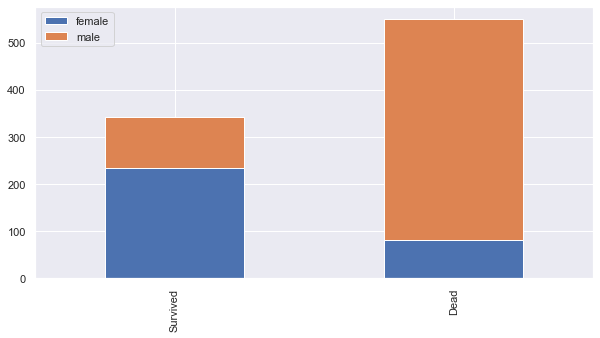

In [13]:
bar_chart('Sex')

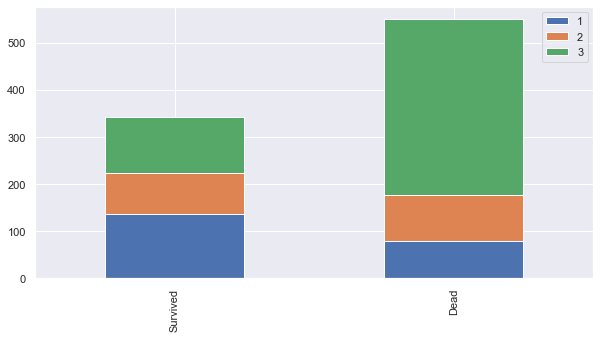

In [14]:
bar_chart('Pclass')

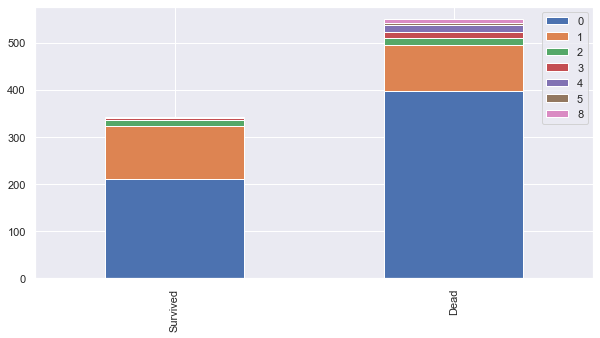

In [15]:
bar_chart('SibSp')

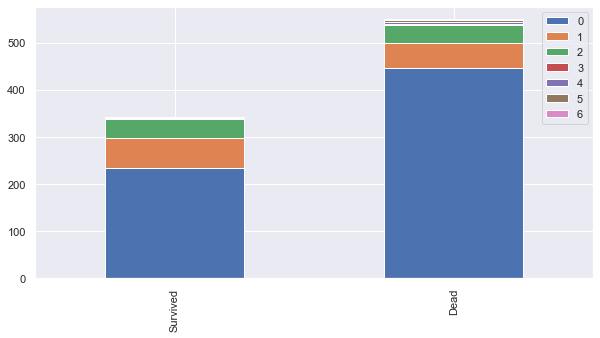

In [16]:
bar_chart('Parch')

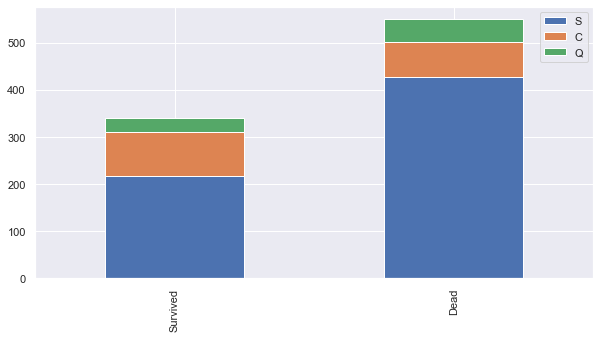

In [17]:
bar_chart('Embarked')

In [18]:
#print(train.head())

In [19]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [20]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Capt          1
Don           1
Sir           1
Mme           1
Jonkheer      1
Lady          1
Countess      1
Ms            1
Name: Title, dtype: int64

In [21]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [22]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 1, 
                 "Master": 2, "Dr": 2, "Rev": 2, "Col": 2, "Major": 2, "Mlle": 2,"Countess": 2,
                 "Ms": 2, "Lady": 2, "Jonkheer": 2, "Don": 2, "Dona" : 2, "Mme": 2,"Capt": 2,"Sir": 2 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [23]:
#print(train.head())

In [24]:
#test.head()

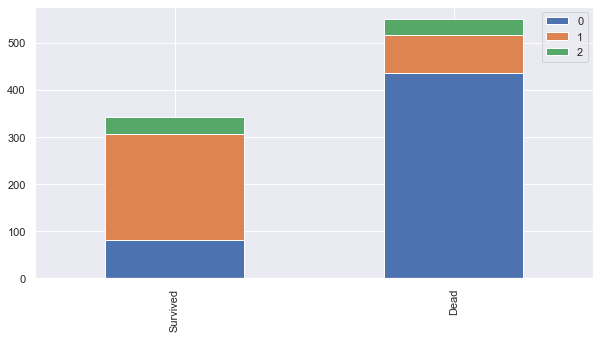

In [25]:
bar_chart('Title')

In [26]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [27]:
#print(train.head())

In [28]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

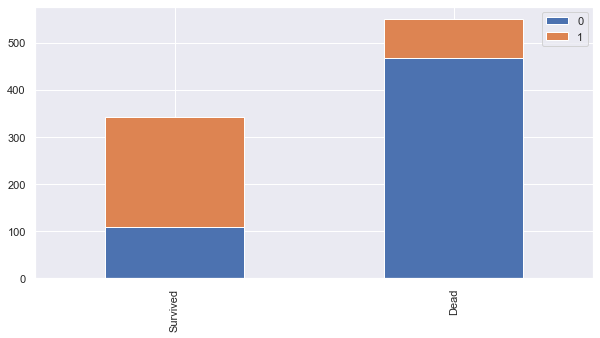

In [29]:
bar_chart('Sex')

In [30]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [31]:
#train.head(30)
train.groupby("Title")["Age"].transform("median")

0      30.0
1      27.0
2      27.0
3      27.0
4      30.0
5      30.0
6      30.0
7       9.0
8      27.0
9      27.0
10     27.0
11     27.0
12     30.0
13     30.0
14     27.0
15     27.0
16      9.0
17     30.0
18     27.0
19     27.0
20     30.0
21     30.0
22     27.0
23     30.0
24     27.0
25     27.0
26     30.0
27     30.0
28     27.0
29     30.0
       ... 
861    30.0
862    27.0
863    27.0
864    30.0
865    27.0
866    27.0
867    30.0
868    30.0
869     9.0
870    30.0
871    27.0
872    30.0
873    30.0
874    27.0
875    27.0
876    30.0
877    30.0
878    30.0
879    27.0
880    27.0
881    30.0
882    27.0
883    30.0
884    30.0
885    27.0
886     9.0
887    27.0
888    27.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

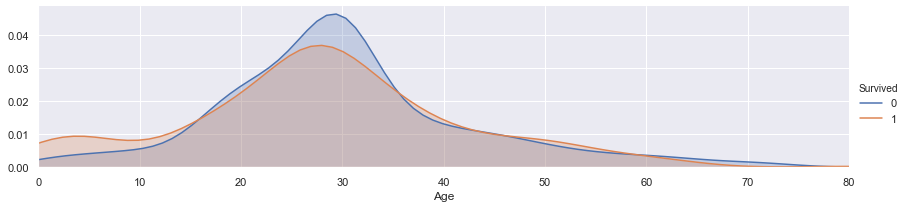

In [32]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [33]:
#train.info()

In [34]:
#test.info()

In [35]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 36), 'Age'] = 1,
    #dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    #dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 36, 'Age'] = 2

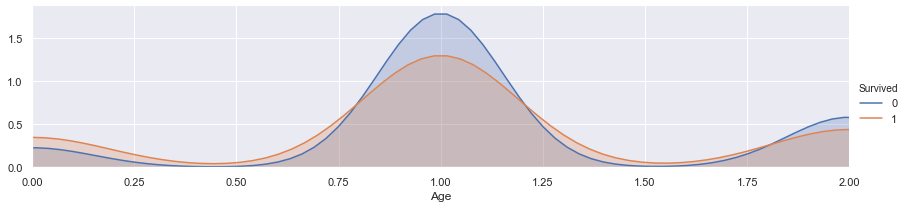

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

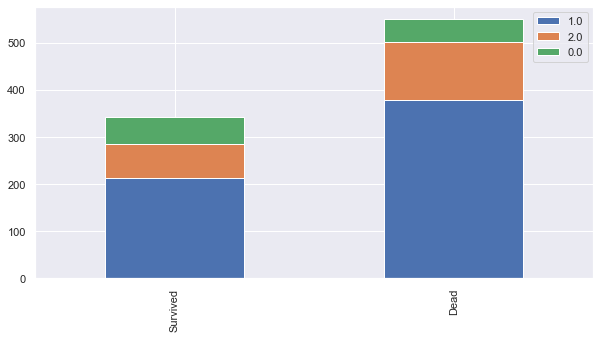

In [37]:
bar_chart('Age')

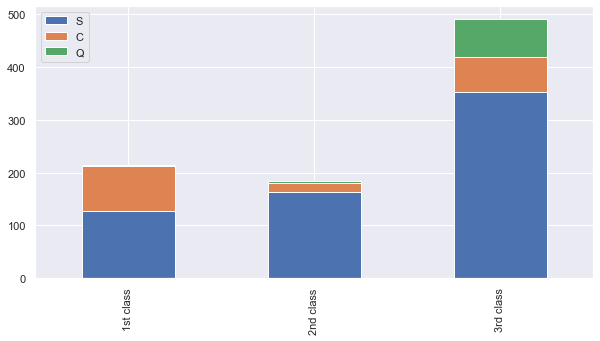

In [38]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [39]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [40]:
#train.head()

In [41]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

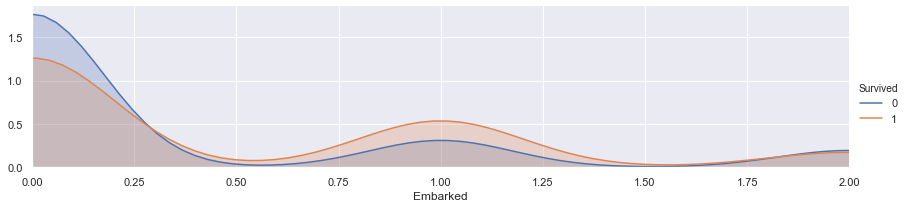

In [42]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Embarked',shade= True)
facet.set(xlim=(0, train['Embarked'].max()))
facet.add_legend()
 
plt.show()

In [43]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,2.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,1.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,0,1.0,0,0,373450,8.0500,NaN,0,0
5,6,0,3,0,1.0,0,0,330877,8.4583,NaN,2,0
6,7,0,1,0,2.0,0,0,17463,51.8625,E46,0,0
7,8,0,3,0,0.0,3,1,349909,21.0750,NaN,0,2
8,9,1,3,1,1.0,0,2,347742,11.1333,NaN,0,1
9,10,1,2,1,0.0,1,0,237736,30.0708,NaN,1,1


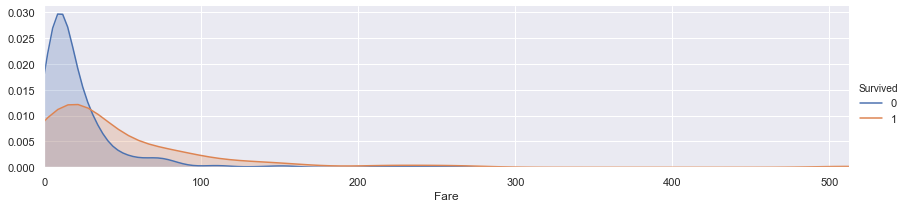

In [44]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()


In [45]:
#print(train.head())




In [46]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

In [47]:
#train.head()

In [48]:
train.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F2                 3
E101               3
D                  3
F33                3
B20                2
D35                2
E121               2
C65                2
C68                2
D20                2
C78                2
C83                2
B35                2
C52                2
F4                 2
D17                2
B77                2
B58 B60            2
D33                2
D26                2
E8                 2
C125               2
B49                2
B57 B59 B63 B66    2
B22                2
E24                2
                  ..
B94                1
A6                 1
D28                1
D7                 1
C70                1
C49                1
C99                1
D19                1
B101               1
D50                1
C148               1
A16                1
D21                1
C103               1
A36                1
D49                1
C82          

In [49]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

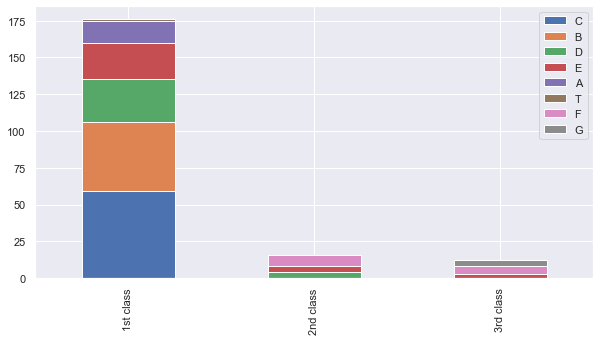

In [50]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [51]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [52]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [53]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1


(0, 11.0)

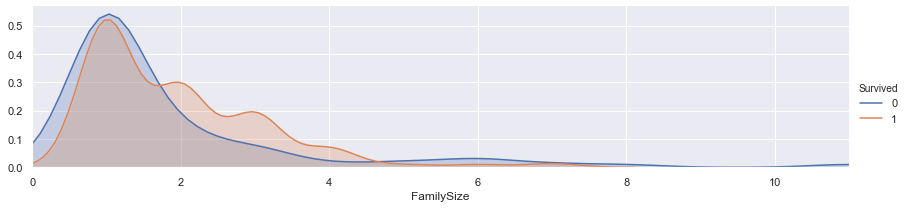

In [54]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

(0, 2.0)

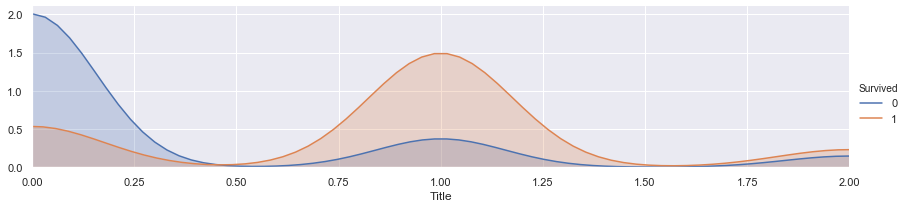

In [55]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Title',shade= True)
facet.set(xlim=(0, train['Title'].max()))
facet.add_legend()
plt.xlim(0)

In [56]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [57]:
#train.head()

In [58]:
#test.head()

In [59]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [60]:
train1=train.copy()
test1=test.copy()

In [61]:
train_data = train1.drop('Survived', axis=1)
target = train1['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [62]:
#train_data.head(10)

In [63]:
#print(train_data.head())

In [64]:
#print(test.head())

In [65]:
train_data=train_data.drop(['FamilySize'],axis=1)
#train_data=train_data.drop(['Title'],axis=1)

In [66]:
test1=test1.drop(['FamilySize'],axis=1)

In [67]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import _split,KFold,StratifiedKFold,cross_val_score

In [68]:
x_train,x_test,y_train,y_test=_split.train_test_split(train_data,target,test_size=0.1,random_state=100)

In [69]:
clf_entropy=SVC(gamma='auto')
clf_entropy.fit(x_train,y_train)
y_pred=clf_entropy.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
score=clf_entropy.score(x_test,y_test)
print(accuracy)
print(score)

0.8333333333333334
0.8333333333333334


In [70]:
print(train_data.head())

Pclass  Sex  Age  Fare  Cabin  Embarked  Title
0       3    0  1.0   0.0    2.0         0      0
1       1    1  2.0   2.0    0.8         1      1
2       3    1  1.0   0.0    2.0         0      1
3       1    1  1.0   2.0    0.8         0      1
4       3    0  1.0   0.0    2.0         0      0


In [71]:
X=np.array(train_data)
Y=np.array(target)
Y=Y.reshape(-1,1)

In [72]:
import tensorflow as tf
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [ ]:
model=Sequential()


model.add(Dense(25))
model.add(Activation('relu'))
model.add(Dense(640))
model.add(Activation('relu'))
model.add(Dense(640))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(1))

model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X,Y,batch_size=32,epochs=20,validation_split=0.1)